# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [13]:
%pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
import warnings
from sklearn.neighbors import LocalOutlierFactor as LOF
warnings.filterwarnings("ignore")


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [14]:
data_set = pd.read_csv("../files/1991_Accidents_UK.csv",index_col="accident_index")
pd.set_option('display.max_columns', None)
data_set.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0975,1991,010SU0975,521300.0,201700.0,NaN,NaN,Metropolitan Police,Serious,2,4,17/08/1991,Saturday,09:48,Hertsmere,-1,-1,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1991010SU0976,1991,010SU0976,521300.0,201700.0,NaN,NaN,Metropolitan Police,Slight,2,1,06/08/1991,Tuesday,00:05,Hertsmere,-1,-1,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1991010SU0977,1991,010SU0977,522100.0,200300.0,NaN,NaN,Metropolitan Police,Serious,2,1,22/07/1991,Monday,13:15,Hertsmere,-1,-1,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199101AB00001,1991,01AB00001,529970.0,178300.0,NaN,NaN,Metropolitan Police,Slight,2,1,06/01/1991,Sunday,00:25,Westminster,-1,-1,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199101AB00002,1991,01AB00002,528910.0,178790.0,NaN,NaN,Metropolitan Police,Slight,1,1,13/01/1991,Sunday,12:02,Westminster,-1,-1,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


# 2- EDA

## Q1 - How does the road surface conditions affect number of accidents?

In [15]:
road_condition_valueCounts = data_set.number_of_casualties.value_counts()
road_condition_valueCounts

1     186342
2      34353
3       9243
4       3568
5       1341
6        557
7        229
8        112
9         46
10        28
13        13
11        11
14         8
12         7
16         7
15         5
19         4
17         3
18         3
21         2
20         1
22         1
24         1
25         1
26         1
32         1
34         1
Name: number_of_casualties, dtype: int64

[Text(0, 0, '')]

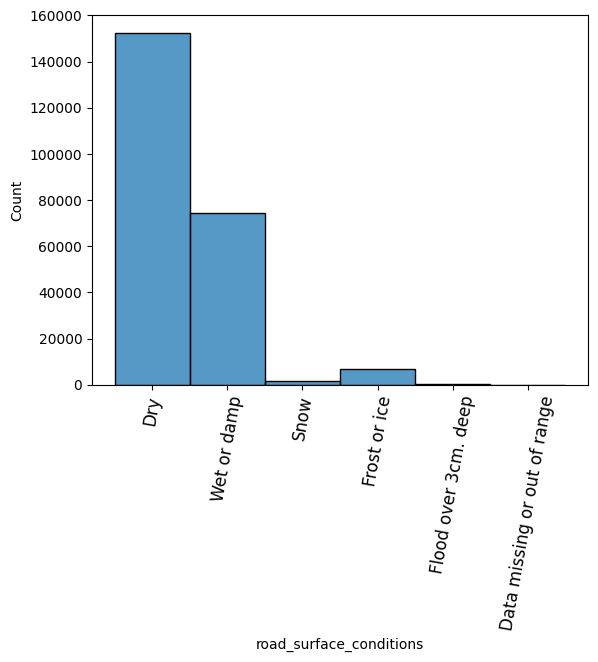

In [16]:
histogram_road_conditions = sns.histplot(data = data_set , x = 'road_surface_conditions')
plt.xticks( rotation=80, fontsize=12)
histogram_road_conditions.bar_label(histogram_road_conditions.containers[0])

## Q2 - How does the type of pedestrain crossing facilities reflect on the number of accidents?

[Text(0, 0, '')]

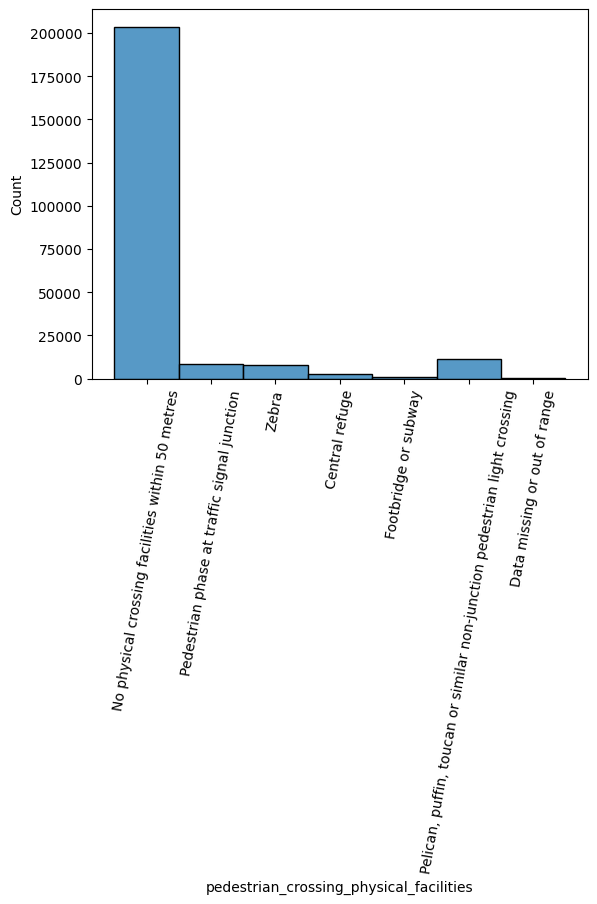

In [17]:
histogram_pedestrian_crossing = sns.histplot(data = data_set , x = 'pedestrian_crossing_physical_facilities')
plt.xticks( rotation=80, fontsize=10)
histogram_pedestrian_crossing.bar_label(histogram_pedestrian_crossing.containers[0])

the existance of physical crossing facility appears to significantly decrease the number of accidents

## Q3 - How does the type of junction contribute ?

[Text(0, 0, '')]

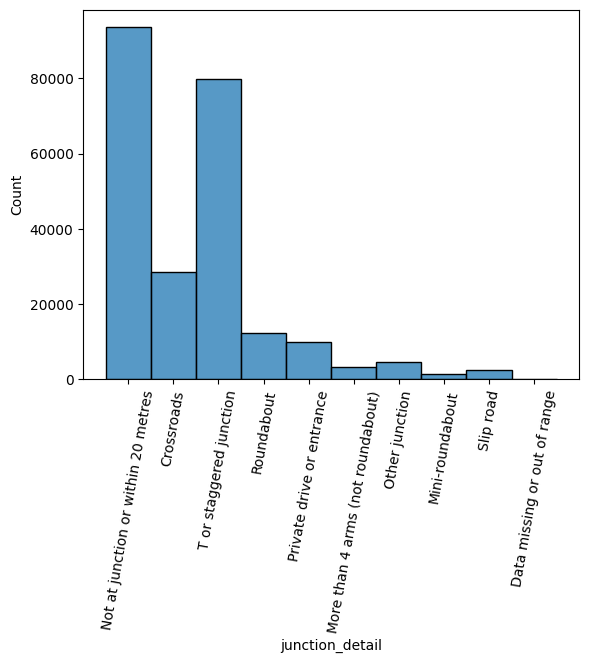

In [18]:
histogram_junction_details = sns.histplot(data = data_set , x = 'junction_detail')
plt.xticks( rotation=80, fontsize=10)
histogram_junction_details.bar_label(histogram_pedestrian_crossing.containers[0])

 straight roads and cross junctions have higher accident rate when compared to roadabouts (roundabout, > 4 arms, mini roundabout)

In [19]:
speed = data_set[data_set.junction_detail=='Not at junction or within 20 metres'].speed_limit
speed = data_set[data_set.junction_detail=='Roundabout'].speed_limit

speed.value_counts()

30.0    7042
60.0    1906
40.0    1839
70.0    1341
50.0     262
0.0        3
15.0       3
20.0       3
Name: speed_limit, dtype: int64

#### what percentage of accidents/casualties were straight roads with no crossing facility?

In [20]:
df_no_crossing = data_set[data_set.pedestrian_crossing_physical_facilities=='No physical crossing facilities within 50 metres']
df = df_no_crossing[data_set.junction_detail=='Not at junction or within 20 metres']
print("non junction accidents percentage",df.size/df_no_crossing.size)


non junction accidents percentage 0.430411194304652


In [21]:
df_no_crossing = data_set[data_set.pedestrian_crossing_physical_facilities=='No physical crossing facilities within 50 metres']
df = df_no_crossing[data_set.junction_detail=='Not at junction or within 20 metres'].number_of_casualties
print("non junction casualties percentage",df.sum()/data_set.number_of_casualties.sum())

non junction casualties percentage 0.3884021479407004


In [22]:
df_no_crossing = data_set[data_set.pedestrian_crossing_physical_facilities=='No physical crossing facilities within 50 metres']
df = df_no_crossing[data_set.junction_detail=='crossroad'].number_of_casualties
print("cross road casualties percentage",df.sum()/data_set.number_of_casualties.sum())

cross road casualties percentage 0.0


#### what percentage of accidents/casualties were T junctions with no crossing facility?

In [23]:
df_no_crossing = data_set[data_set.pedestrian_crossing_physical_facilities=='No physical crossing facilities within 50 metres']
df = df_no_crossing[data_set.junction_detail=='T or staggered junction'].number_of_casualties
print("T junction casualties percentage",df.sum()/data_set.number_of_casualties.sum())

T junction casualties percentage 0.2750186274761697


#### it may seem at first that lack of crossing facilities is the number one factor however its not the case as half of the accidents took place on roads where crossing facilities are not needed.

## Q4 -  What is the relation between the seriousness of an accident and light conditions?

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Daylight'),
  Text(1, 0, 'Darkness - no lighting'),
  Text(2, 0, 'Darkness - lights lit'),
  Text(3, 0, 'Darkness - lighting unknown'),
  Text(4, 0, 'Darkness - lights unlit'),
  Text(5, 0, 'Data missing or out of range')])

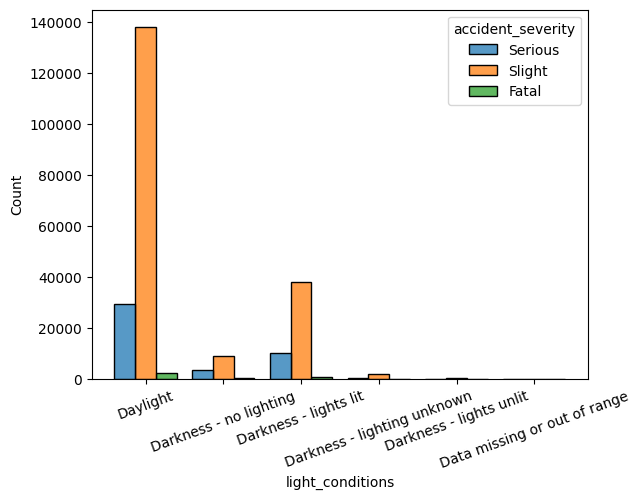

In [24]:

# serious_accidents = data_set.loc[data_set["accident_severity"] == "Serious"]
plot2 =sns.histplot(data = data_set , x = "light_conditions" , hue = "accident_severity", multiple="dodge", shrink=.8)
plt.xticks(rotation=20)



## Q5 -  What is the relation between number of vehicles and speed limit of the road?

<AxesSubplot: xlabel='speed_limit', ylabel='number_of_vehicles'>

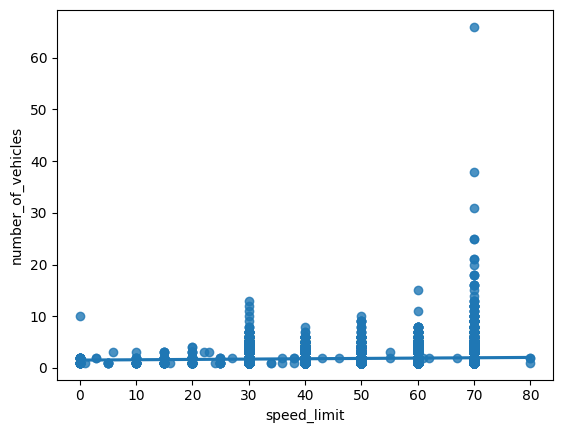

In [25]:
 sns.regplot(x=data_set.speed_limit , y=data_set.number_of_vehicles)


In [26]:
data_set.day_of_week.value_counts()

Friday       39810
Thursday     35324
Monday       34328
Saturday     34032
Tuesday      33464
Wednesday    32982
Sunday       25949
Name: day_of_week, dtype: int64

## Q6 -  What is the most frequent hour at which the most accidents occur?

In [27]:
data_temp  = data_set.dropna(subset=['time'])
time_in_hours_string = data_set.time.str[:2]
time_in_hours_float = time_in_hours_string.astype(float)
time_in_hours_float.head()
time_in_hours_float.value_counts().index[0]


17.0

<AxesSubplot: >

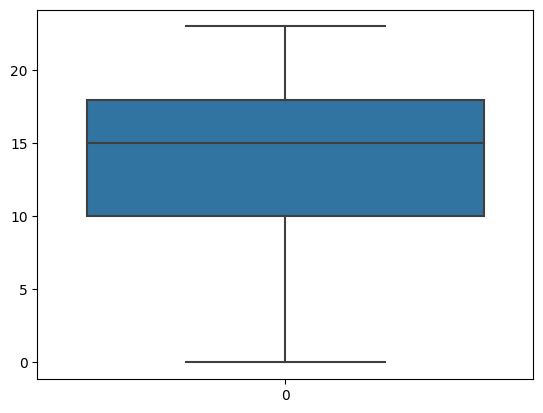

In [28]:
sns.boxplot(time_in_hours_float)

<AxesSubplot: xlabel='time', ylabel='Density'>

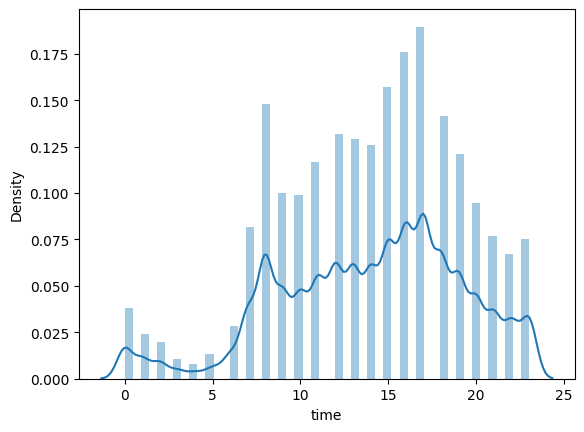

In [29]:
sns.distplot(time_in_hours_float)

In [30]:
data_set.local_authority_district.value_counts()

Birmingham    3878
836           3183
Leeds         3035
Liverpool     2981
Manchester    2693
              ... 
807             54
805             49
811             41
801             39
698              1
Name: local_authority_district, Length: 464, dtype: int64

## In which day occurs the most accidents during snow?

In [31]:
data_set.weather_conditions.unique()
data_temp2  = data_set.loc[(data_set['weather_conditions'] == 'Snowing no high winds') | (data_set['weather_conditions'] == 'Snowing + high winds')]
day1 = data_temp2.day_of_week.value_counts()
day2 = day1.index[0]
day2

'Thursday'

In [32]:
data_temp2.weather_conditions.unique()


array(['Snowing no high winds', 'Snowing + high winds'], dtype=object)

[Text(0, 0, '')]

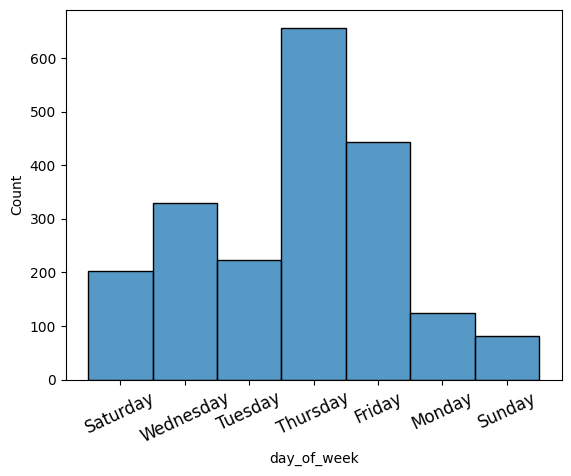

In [33]:

histogram_snowing_weather = sns.histplot(data = data_temp2 , x = 'day_of_week')
plt.xticks( rotation=25, fontsize=12)
histogram_snowing_weather.bar_label(histogram_snowing_weather.containers[0])

## What's causing Fatal accidents in accident_seveirty Case?

In [34]:
data_set.accident_severity.value_counts()

Slight     187958
Serious     43773
Fatal        4158
Name: accident_severity, dtype: int64

In [35]:
data_set[data_set.accident_severity == 'Fatal'].pedestrian_crossing_human_control.value_counts()

None within 50 metres                 4143
Control by school crossing patrol       11
Data missing or out of range             2
Control by other authorised person       2
Name: pedestrian_crossing_human_control, dtype: int64

In [36]:
data_set[data_set.accident_severity == 'Fatal'].pedestrian_crossing_physical_facilities.value_counts()

No physical crossing facilities within 50 metres                             3683
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     191
Zebra                                                                          95
Central refuge                                                                 83
Pedestrian phase at traffic signal junction                                    81
Footbridge or subway                                                           23
Data missing or out of range                                                    2
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [37]:
data_set[data_set.accident_severity == 'Fatal'].speed_limit.value_counts()

30.0    1704
60.0    1527
70.0     460
40.0     378
50.0      84
20.0       2
0.0        1
38.0       1
25.0       1
Name: speed_limit, dtype: int64

##### This shows that fatal accidents most probably occured due to lack of pedestrian control/pedestrian facilities in areas, which may give us the conclusion that pedestrians wrongly crossing the streets were a major reason for fatal accidents.

# 3 - Cleaning Data

## Observing Missing and Duplicate Data

### Null and Missing Values in Features:

In [38]:
data_set.shape

(235889, 35)

The dataset starts with 35 columns and 235889 rows, this is prior to any cleaning or encoding

In [39]:
data_set.isnull().sum().sort_values()

accident_year                                       0
did_police_officer_attend_scene_of_accident         0
urban_or_rural_area                                 0
carriageway_hazards                                 0
special_conditions_at_site                          0
road_surface_conditions                             0
light_conditions                                    0
pedestrian_crossing_physical_facilities             0
pedestrian_crossing_human_control                   0
second_road_class                                   0
junction_control                                    0
junction_detail                                     0
speed_limit                                         0
trunk_road_flag                                     0
first_road_class                                    0
lsoa_of_accident_location                           0
local_authority_ons_district                        0
accident_reference                                  0
police_force                

In [40]:
data_set.columns[data_set.isin(['Data missing or out of range']).any()] 

Index(['road_type', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')

In [41]:
data_set.columns[data_set.isin([-1]).any()] | data_set.columns[data_set.isin(['-1']).any()]

Index(['first_road_class', 'local_authority_highway',
       'local_authority_ons_district', 'lsoa_of_accident_location',
       'second_road_class'],
      dtype='object')

### Investigating Missing Values:

#### 1- Time and date as well as longitude and latitude are missing at random. 
#### 2- Investigating second_road_number and second_road_class as they might have something to do with no junction

In [42]:
data_set.second_road_class.value_counts()

Unclassified    101605
-1               94511
A                18443
C                11441
B                 8643
Motorway          1091
A(M)               155
Name: second_road_class, dtype: int64

In [43]:
df = data_set[data_set.junction_detail=='Not at junction or within 20 metres']
df.second_road_number.isna().value_counts()/data_set.second_road_number.isna().value_counts()

False    0.000149
True     0.989919
Name: second_road_number, dtype: float64

In [44]:
data_set[data_set.second_road_number.isna()].second_road_class.value_counts()

-1    94511
A        15
B         9
Name: second_road_class, dtype: int64

##### second_road_number and second_road_class are not missing at random as there are no junctions 

#### 3- Investigating road types

In [45]:
data_set.road_type.value_counts()

Single carriageway              185392
Dual carriageway                 32120
Roundabout                       10778
One way street/Slip road          6617
Data missing or out of range        11
Name: road_type, dtype: int64

In [46]:
df = data_set[data_set.road_type.isna()]
df.junction_detail.value_counts()

Not at junction or within 20 metres    410
T or staggered junction                265
Crossroads                              90
Other junction                          80
Private drive or entrance               60
More than 4 arms (not roundabout)       24
Roundabout                              21
Slip road                               18
Mini-roundabout                          3
Name: junction_detail, dtype: int64

##### what's the probability that a road type is single carriageway given there is no junction?

In [47]:
def relation(df:pd.DataFrame,junctionColumn:str,roadType:str) :
    for junction , _ in df[junctionColumn].value_counts().items():
        for road , _ in df[roadType].value_counts().items():
            df_new = data_set[data_set.junction_detail==junction]
            percentage = df_new[df_new.road_type==road].size/df_new.size
            print(junction," | ",road," | ",percentage)

In [48]:
relation(data_set,"junction_detail","road_type")

Not at junction or within 20 metres  |  Single carriageway  |  0.8077091546211126
Not at junction or within 20 metres  |  Dual carriageway  |  0.1652511137463543
Not at junction or within 20 metres  |  Roundabout  |  0.00016025127399762828
Not at junction or within 20 metres  |  One way street/Slip road  |  0.022403128104868435
Not at junction or within 20 metres  |  Data missing or out of range  |  9.615076439857697e-05
T or staggered junction  |  Single carriageway  |  0.872876054152799
T or staggered junction  |  Dual carriageway  |  0.0932909586847176
T or staggered junction  |  Roundabout  |  7.507319636645729e-05
T or staggered junction  |  One way street/Slip road  |  0.030442181126598432
T or staggered junction  |  Data missing or out of range  |  0.0
Crossroads  |  Single carriageway  |  0.8019288093985621
Crossroads  |  Dual carriageway  |  0.1596352796773628
Crossroads  |  Roundabout  |  3.506926179203928e-05
Crossroads  |  One way street/Slip road  |  0.03517446957741539
Cr

##### We come to the conclusion that most road types in relation with junctions are as follows:

##### For junction_detail: No Junctions, Other junction, Private drive or entrance and More than 4 arms (not roundabout), it's more probable that road_type is Single carriageway
##### For junction_detail Roundabout, it's more probable that the road_type is Roundabout
##### For junction_detail Slip road, it's more probable that road_type is Dual carriageway 
##### For junction_detail Mini-roundabout, it's more probable that road_type is Roundabout

##### This can be used when imputing road_type missing values, where we can impute with the most probable road_type based on the junction_detail

##### and since there's no relation between missing values of road_types and any other feature, so they're missing at random

#### 4- Investigating first_road_number and first_road_class

In [49]:
data_set.first_road_number.value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     89422
6.0                                                                                                      2496
1.0                                                                                                      2412
4.0                                                                                                      1982
40.0                                                                                                     1661
                                                                                                        ...  
4323.0                                                                                                      1
6542.0                                                                                                      1
7060.0                                                                                                      1
5461.0    

In [50]:
data_set.first_road_class.value_counts()

A               110689
Unclassified     69064
B                29487
C                20358
Motorway          5853
A(M)               436
-1                   2
Name: first_road_class, dtype: int64

##### Missing values in first_road_class/number are missing at random. 

#### 5- Investigating did_police_officer_attend_scene_of_accident, trunk_road_flag, urban_or_rural_area, longitude, latitude, local_authority_highway, local_authority_ons_district, lsoa_of_accident_location

In [51]:
def Useless_columns(df:pd.DataFrame)-> list:
    x = []
    for col in df.columns.to_list():
        if len(df[col].value_counts()) == 1:
            x.append(col)
    return x


In [52]:
list_to_be_removed = Useless_columns(data_set)

##### For all of the above features, all observations are missing, and they're missing at random


#### 6- Investigating road_surface_conditions

In [53]:
data_set.road_surface_conditions.value_counts()

Dry                             152472
Wet or damp                      74234
Frost or ice                      6989
Snow                              1807
Flood over 3cm. deep               276
Data missing or out of range       111
Name: road_surface_conditions, dtype: int64

##### Data missing at random

#### 7- Investigating junction_control

In [54]:
data_set.junction_control.value_counts()

Give way or uncontrolled        119873
Data missing or out of range     93754
Auto traffic signal              19685
Stop sign                         2388
Authorised person                  189
Name: junction_control, dtype: int64

In [55]:
data_set[data_set.junction_control == "Data missing or out of range"].junction_detail.value_counts()

Not at junction or within 20 metres    93504
T or staggered junction                  101
Private drive or entrance                 56
Other junction                            32
Crossroads                                31
Roundabout                                15
Slip road                                  6
More than 4 arms (not roundabout)          4
Data missing or out of range               3
Mini-roundabout                            2
Name: junction_detail, dtype: int64

##### It's clear that missing data in junction_control is mostly due to the fact that there are no junctions, so they're not missing at random

#### 8- Investigating junction_detail

In [56]:
data_set.junction_detail.value_counts()

Not at junction or within 20 metres    93603
T or staggered junction                79922
Crossroads                             28515
Roundabout                             12399
Private drive or entrance               9916
Other junction                          4660
More than 4 arms (not roundabout)       3131
Slip road                               2478
Mini-roundabout                         1262
Data missing or out of range               3
Name: junction_detail, dtype: int64

#### 9- Investigating pedestrian_crossing_human_control and pedestrian_crossing_physical_facilities

In [57]:
data_set.pedestrian_crossing_human_control.value_counts()

None within 50 metres                 234862
Control by school crossing patrol        790
Data missing or out of range             131
Control by other authorised person       106
Name: pedestrian_crossing_human_control, dtype: int64

In [58]:
data_set.pedestrian_crossing_physical_facilities.value_counts()

No physical crossing facilities within 50 metres                             203675
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     11506
Pedestrian phase at traffic signal junction                                    8732
Zebra                                                                          7834
Central refuge                                                                 2922
Footbridge or subway                                                           1089
Data missing or out of range                                                    131
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [59]:
data_set[data_set.pedestrian_crossing_human_control == 'Data missing or out of range'].pedestrian_crossing_physical_facilities.value_counts()

Data missing or out of range    131
Name: pedestrian_crossing_physical_facilities, dtype: int64

##### Entires that are missing for pedestrian_crossing_human_control, are missing for pedestrian_crossing_physical_facilities as well

#### 10- Investigating light_conditions and weather_conditions

In [60]:
data_set.light_conditions.value_counts()

Daylight                        169925
Darkness - lights lit            49378
Darkness - no lighting           13190
Darkness - lighting unknown       2501
Darkness - lights unlit            834
Data missing or out of range        61
Name: light_conditions, dtype: int64

In [61]:
data_set.weather_conditions.value_counts()

Fine no high winds              186615
Raining no high winds            29292
Other                             4817
Raining + high winds              4484
Fine + high winds                 4245
Fog or mist                       2859
Snowing no high winds             1694
Snowing + high winds               366
Data missing or out of range        10
Name: weather_conditions, dtype: int64

#### 11- Investigating special_condition_at_site

In [62]:
data_set.special_conditions_at_site.value_counts()

None                                          229758
Roadworks                                       3905
Road surface defective                          1189
Auto traffic signal - out                        440
Road sign or marking defective or obscured       388
Auto signal part defective                       177
Data missing or out of range                      32
Name: special_conditions_at_site, dtype: int64

#### 12- Investigating carriageway_hazards

In [63]:
data_set.carriageway_hazards.value_counts()

None                            229047
Other object on road              4129
Other animal on road              1284
Dog on road                        661
Previous accident                  419
Vehicle load on road               311
Data missing or out of range        38
Name: carriageway_hazards, dtype: int64

### Check Duplicates in Dataset

#### There are no duplicate values in the data set

In [64]:
data_set.duplicated(subset = None, keep = 'first').value_counts()

False    235889
dtype: int64

In [65]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235889 entries, 1991010SU0975 to 1991986016491
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                235889 non-null  int64  
 1   accident_reference                           235889 non-null  object 
 2   location_easting_osgr                        235781 non-null  float64
 3   location_northing_osgr                       235781 non-null  float64
 4   longitude                                    0 non-null       float64
 5   latitude                                     0 non-null       float64
 6   police_force                                 235889 non-null  object 
 7   accident_severity                            235889 non-null  object 
 8   number_of_vehicles                           235889 non-null  int64  
 9   number_of_casualties                         

##### No duplicates in dataset

## Handling Missing Data

### Drop Columns With No Observations

In [66]:
list_to_be_removed

['accident_year',
 'local_authority_ons_district',
 'local_authority_highway',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

#### did_police_officer_attend_scene_of_accident, trunk_road_flag, urban_or_rural_area, longitude, latitude, local_authority_highway, local_authority_ons_district, lsoa_of_accident_location

In [67]:
df_nullrep = data_set.replace({'-1':np.nan, -1:np.nan, 'Data missing or out of range':np.nan})
clean_df = df_nullrep.dropna(axis='columns',how='all')
clean_df.isnull().sum().sort_values()

accident_year                                  0
accident_reference                             0
speed_limit                                    0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
local_authority_district                       0
date                                           2
time                                           2
first_road_class                               2
junction_detail                                3
first_road_number                             19
special_conditions_at_site                    32
carriageway_hazards                           38
light_conditions                              61
location_northing_osgr                       108
location_easting_osgr                        108
road_surface_conditions                      111
pedestrian_crossing_

### Drop Whole Rows With Null Values in: 

####  ['date','time','first_road_number','junction_detail', 'first_road_class','location_northing_osgr', 'location_easting_osgr', 'road_surface_conditions', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'road_type', 'weather_conditions','light_conditions','special_conditions_at_site','carriageway_hazards']

##### (number of missing entries is way less than 5%)

In [68]:
subs = ['date','time','first_road_number','junction_detail',
        'first_road_class','location_northing_osgr', 'location_easting_osgr', 
        'road_surface_conditions', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 
        'road_type', 'weather_conditions','light_conditions','special_conditions_at_site','carriageway_hazards']

clean_df = clean_df.dropna(axis='index', how='any', subset=subs)
clean_df.isnull().sum()

accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                           92555
second_road_class                          93301
second_road_number                         93323
pedestrian_crossing_

In [69]:
print(f'Shape of dataset before: {clean_df.shape[0]}, {len(df_nullrep.columns)}, Shape of dataset after: {df_nullrep.shape[0]}, {len(clean_df.columns)}')

Shape of dataset before: 233056, 35, Shape of dataset after: 235889, 27


### Missing Values in junction_control, second_road_class and second_road_number

#### Since data is mostly missing as there's no junction, so it shouldn't be dropped. Instead, we replace null values in junction_control with 'No Junction' and in second_road_class/number with 'No Second Road'

In [70]:
clean_df['junction_control'] = clean_df['junction_control'].fillna('No Junction')
clean_df['second_road_class'] = clean_df['second_road_class'].fillna('No Second Road')
clean_df['second_road_number'] = clean_df['second_road_number'].fillna('No Second Road')
clean_df

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0975,1991.0,010SU0975,521300.0,201700.0,Metropolitan Police,Serious,2.0,4.0,17/08/1991,Saturday,09:48,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
1991010SU0976,1991.0,010SU0976,521300.0,201700.0,Metropolitan Police,Slight,2.0,1.0,06/08/1991,Tuesday,00:05,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None
1991010SU0977,1991.0,010SU0977,522100.0,200300.0,Metropolitan Police,Serious,2.0,1.0,22/07/1991,Monday,13:15,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road
199101AB00001,1991.0,01AB00001,529970.0,178300.0,Metropolitan Police,Slight,2.0,1.0,06/01/1991,Sunday,00:25,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None
199101AB00002,1991.0,01AB00002,528910.0,178790.0,Metropolitan Police,Slight,1.0,1.0,13/01/1991,Sunday,12:02,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014691,1991.0,986014691,260800.0,506100.0,Dumfries and Galloway,Slight,1.0,1.0,22/10/1991,Tuesday,20:30,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
1991986014791,1991.0,986014791,206300.0,560700.0,Dumfries and Galloway,Serious,1.0,1.0,12/11/1991,Tuesday,11:10,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None
1991986015091,1991.0,986015091,206300.0,560900.0,Dumfries and Galloway,Slight,2.0,1.0,15/11/1991,Friday,15:55,856,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None


## Observing Outliers

This function calculates outliers with IQR method and returns the total number of outliers in the targeted column

In [71]:
def observe_outliers (dframe , index_of_column):
    if dframe[dframe.columns[index_of_column]].dtype == 'object':
        pass
    else:
        Q1 = dframe[dframe.columns[index_of_column]].quantile(0.25)
        Q3= dframe[dframe.columns[index_of_column]].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        to_remove = dframe[ (dframe[dframe.columns[index_of_column]] > upper) | (dframe[dframe.columns[index_of_column]] < lower) ]
        to_return = to_remove
        print(len(to_return))
        return to_return

In [72]:
clean_df.columns.get_loc('speed_limit')

15

In [73]:
clean_df.columns.get_loc('number_of_vehicles')

6

In [74]:
clean_df.columns.get_loc('number_of_casualties')

7

In [75]:
outliers_num_of_vehicles = observe_outliers(clean_df ,6)
# len(outliers_num_of_vehicles)

4889


In [76]:
outliers_num_of_casulties = observe_outliers(clean_df ,7 )
outliers_num_of_casulties.number_of_casualties.value_counts()

49163


2.0     34066
3.0      9177
4.0      3546
5.0      1337
6.0       555
7.0       227
8.0       111
9.0        46
10.0       28
13.0       13
11.0       11
14.0        8
12.0        7
16.0        7
15.0        5
19.0        4
18.0        3
17.0        3
21.0        2
20.0        1
26.0        1
34.0        1
32.0        1
22.0        1
24.0        1
25.0        1
Name: number_of_casualties, dtype: int64

### We can see that number of outliers is huge compared to the length of the data set. Also, all casualties other than 1 is considered an outlier. So, we decided to use another method for observing outliers which is LOF.

In [77]:
outliers_speed_limit =observe_outliers(clean_df,15)

0


## Handling outliers

We chose the Local outlier factor method to remove outliers as it considers multiple features at a time and provides logical results that take other features into account.

We apply it to the three numerical features shown below. For the locations, we apply another LOF based on easting and northing.

In [78]:
outliers_removed = clean_df.copy()
outliers_columns = outliers_removed[['speed_limit', 'number_of_casualties' , 'number_of_vehicles']]
outliers_columns.head()
predictions = LOF().fit_predict(outliers_columns)
outliers_removed['outlier'] = predictions

In [79]:
outliers1 = outliers_removed[outliers_removed.outlier == -1]
outliers_removed = outliers_removed[outliers_removed.outlier == 1]
del outliers_removed['outlier']


In [80]:
outliers_columns = outliers_removed[['location_easting_osgr', 'location_northing_osgr' ]]
outliers_columns.head()
predictions = LOF().fit_predict(outliers_columns)
outliers_removed['outlier'] = predictions

In [81]:
outliers2 = outliers_removed[outliers_removed.outlier == -1]
outliers_removed = outliers_removed[outliers_removed.outlier == 1]
del outliers_removed['outlier']

In [82]:
# # # print(f"Number of outliers = {outliers}")
# print(f"Number of outliers = {len(outliers)+ len(outliers2)}")
# print(f"Percentage of outliers = {(len(outliers) +len(outliers2)) / len(clean_df)} ")

In [83]:
len(clean_df) -len(outliers_removed)

12766

## Findings and conclusions

After using LOF, the total number of outliers found = 12766 which represent around 5% of the data set. The number seems reasonable and logical. We find that LOF suits our data set. So, we remove outliers detected

# 4 - Data transformation

## 4.1 - Discretization

Adding 'Week_Number' column to dataset using 'date' column.

In [84]:
week_added = outliers_removed.copy()
week_added.date = pd.to_datetime(week_added.date)

week_added['Week_Number'] = week_added['date'].dt.isocalendar().week
week_added.Week_Number

accident_index
1991010SU0977    30
199101AB00001    22
199101AB00002     2
199101AB00003    14
199101AB00004    48
                 ..
1991986014291    19
1991986014791    50
1991986015091    46
1991986015491    47
1991986016491    51
Name: Week_Number, Length: 220290, dtype: UInt32

In [85]:
week_added.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,1991.0,010SU0977,522100.0,200300.0,Metropolitan Police,Serious,2.0,1.0,1991-07-22,Monday,13:15,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30
199101AB00001,1991.0,01AB00001,529970.0,178300.0,Metropolitan Police,Slight,2.0,1.0,1991-06-01,Sunday,00:25,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22
199101AB00002,1991.0,01AB00002,528910.0,178790.0,Metropolitan Police,Slight,1.0,1.0,1991-01-13,Sunday,12:02,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2
199101AB00003,1991.0,01AB00003,529910.0,179480.0,Metropolitan Police,Slight,1.0,1.0,1991-04-01,Friday,08:50,Westminster,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14
199101AB00004,1991.0,01AB00004,529810.0,178390.0,Metropolitan Police,Slight,1.0,1.0,1991-12-01,Saturday,12:02,Westminster,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48


## 4.2 - Adding Additional 'Season' and 'rush_hour' Columns 

A 'Season' column is added where it specifies which season in the year the accident occured, this is done using the information from the 'date' column. 

In [86]:
ready_to_encode1 = week_added.copy()
month_num = ready_to_encode1['date'].dt.month

season_dict =  dict.fromkeys([1, 2, 12], 'Winter') | dict.fromkeys([3, 4, 5], 'Spring') | dict.fromkeys([6, 7, 8], 'Summer') | dict.fromkeys([9, 10, 11], 'Fall')
ready_to_encode1['Season'] = month_num.apply(lambda x: season_dict[x])
ready_to_encode1

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,1991.0,010SU0977,522100.0,200300.0,Metropolitan Police,Serious,2.0,1.0,1991-07-22,Monday,13:15,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer
199101AB00001,1991.0,01AB00001,529970.0,178300.0,Metropolitan Police,Slight,2.0,1.0,1991-06-01,Sunday,00:25,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer
199101AB00002,1991.0,01AB00002,528910.0,178790.0,Metropolitan Police,Slight,1.0,1.0,1991-01-13,Sunday,12:02,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter
199101AB00003,1991.0,01AB00003,529910.0,179480.0,Metropolitan Police,Slight,1.0,1.0,1991-04-01,Friday,08:50,Westminster,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring
199101AB00004,1991.0,01AB00004,529810.0,178390.0,Metropolitan Police,Slight,1.0,1.0,1991-12-01,Saturday,12:02,Westminster,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,1991.0,986014291,206400.0,560700.0,Dumfries and Galloway,Slight,1.0,1.0,1991-05-11,Tuesday,15:00,856,C,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring
1991986014791,1991.0,986014791,206300.0,560700.0,Dumfries and Galloway,Serious,1.0,1.0,1991-12-11,Tuesday,11:10,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter
1991986015091,1991.0,986015091,206300.0,560900.0,Dumfries and Galloway,Slight,2.0,1.0,1991-11-15,Friday,15:55,856,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall


Adding 'rush_hour' column which is from 7AM-9AM and 4PM-6PM on weekdays, excluding weekends.

In [87]:
from datetime import time
ready_to_encode = ready_to_encode1.copy()
weekday = (ready_to_encode.day_of_week != "Saturday") & (ready_to_encode.day_of_week != "Sunday")
x = pd.to_datetime(ready_to_encode['time'], format='%H:%M').dt.hour
rush_hour = ((x.between(16,18) | x.between(7,9)) & weekday).astype(int)
ready_to_encode['rush_hour'] = rush_hour

ready_to_encode

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season,rush_hour
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,1991.0,010SU0977,522100.0,200300.0,Metropolitan Police,Serious,2.0,1.0,1991-07-22,Monday,13:15,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer,0
199101AB00001,1991.0,01AB00001,529970.0,178300.0,Metropolitan Police,Slight,2.0,1.0,1991-06-01,Sunday,00:25,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer,0
199101AB00002,1991.0,01AB00002,528910.0,178790.0,Metropolitan Police,Slight,1.0,1.0,1991-01-13,Sunday,12:02,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter,0
199101AB00003,1991.0,01AB00003,529910.0,179480.0,Metropolitan Police,Slight,1.0,1.0,1991-04-01,Friday,08:50,Westminster,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring,1
199101AB00004,1991.0,01AB00004,529810.0,178390.0,Metropolitan Police,Slight,1.0,1.0,1991-12-01,Saturday,12:02,Westminster,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,1991.0,986014291,206400.0,560700.0,Dumfries and Galloway,Slight,1.0,1.0,1991-05-11,Tuesday,15:00,856,C,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring,0
1991986014791,1991.0,986014791,206300.0,560700.0,Dumfries and Galloway,Serious,1.0,1.0,1991-12-11,Tuesday,11:10,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter,0
1991986015091,1991.0,986015091,206300.0,560900.0,Dumfries and Galloway,Slight,2.0,1.0,1991-11-15,Friday,15:55,856,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall,0


## 4.3 - Encoding

After the addition of three new columns to the dataset: Week_Number, Season and rush_hour the dataset is ready for encoding of its categorical features.

'accident_reference' column is unique for each observation so it adds no information >> we remove it, and 'accident_year' is the same for all observations (1991), it adds no new information as well so it's removed

In [88]:
del ready_to_encode['accident_reference']


In [89]:
del ready_to_encode['accident_year']

deleted 'date' column from the dataset in order to facilitate the encoding process.

In [90]:
del ready_to_encode['date']

In [91]:
ready_to_encode

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season,rush_hour
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,Metropolitan Police,Serious,2.0,1.0,Monday,13:15,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer,0
199101AB00001,529970.0,178300.0,Metropolitan Police,Slight,2.0,1.0,Sunday,00:25,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer,0
199101AB00002,528910.0,178790.0,Metropolitan Police,Slight,1.0,1.0,Sunday,12:02,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter,0
199101AB00003,529910.0,179480.0,Metropolitan Police,Slight,1.0,1.0,Friday,08:50,Westminster,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring,1
199101AB00004,529810.0,178390.0,Metropolitan Police,Slight,1.0,1.0,Saturday,12:02,Westminster,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,206400.0,560700.0,Dumfries and Galloway,Slight,1.0,1.0,Tuesday,15:00,856,C,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring,0
1991986014791,206300.0,560700.0,Dumfries and Galloway,Serious,1.0,1.0,Tuesday,11:10,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter,0
1991986015091,206300.0,560900.0,Dumfries and Galloway,Slight,2.0,1.0,Friday,15:55,856,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall,0


#### 1- Label Encoding

In [92]:
def label_encode(df,col)->dict:
    label_encoder = preprocessing.LabelEncoder()
    before = df[col].unique()
    df[col] = label_encoder.fit_transform(df[col])
    after= df[col].unique()
    map = zip(before,after)
    return list(map)

mapping would be later used to write the lookup csv

In [93]:
mapping = dict()

Label encoding is done for features that can be ranked, in our case we chose 'accident_severity' as the only feature that can be ranked in the dataset, having 3 categories with meaningful order: Slight, Serious and Fatal 

In [94]:
trial1 = ready_to_encode.copy()

'accident_severity' categories before encoding:

In [95]:
ready_to_encode.accident_severity.value_counts()

Slight     176112
Serious     40442
Fatal        3736
Name: accident_severity, dtype: int64

In [96]:
ready_to_encode.police_force.value_counts()

Metropolitan Police      39623
Greater Manchester       11712
West Midlands             8953
Strathclyde               8256
West Yorkshire            8081
Thames Valley             6991
Merseyside                6659
Hampshire                 6655
Essex                     5863
Kent                      5621
Lancashire                5418
Sussex                    5217
Devon and Cornwall        4890
Northumbria               4715
Staffordshire             4643
Nottinghamshire           4474
South Wales               4267
Avon and Somerset         4152
South Yorkshire           4089
West Mercia               3837
Surrey                    3729
Cheshire                  3651
Humberside                3457
Derbyshire                3278
Leicestershire            3270
Lothian and Borders       3224
Cambridgeshire            3169
Norfolk                   3149
Hertfordshire             2949
North Yorkshire           2818
North Wales               2631
Dorset                    2236
Northamp

'accident_severity' categories after label encoding:

In [97]:
mapping["accident_severity"] = label_encode(trial1,"accident_severity")

In [98]:
mapping

{'accident_severity': [('Serious', 1), ('Slight', 2), ('Fatal', 0)]}

Fatal accidents are labelled as 0, Serious accidents are labelled as 1, and Slight accidents are labelled as 2

In [99]:
trial1

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season,rush_hour
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,Metropolitan Police,1,2.0,1.0,Monday,13:15,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer,0
199101AB00001,529970.0,178300.0,Metropolitan Police,2,2.0,1.0,Sunday,00:25,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer,0
199101AB00002,528910.0,178790.0,Metropolitan Police,2,1.0,1.0,Sunday,12:02,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter,0
199101AB00003,529910.0,179480.0,Metropolitan Police,2,1.0,1.0,Friday,08:50,Westminster,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring,1
199101AB00004,529810.0,178390.0,Metropolitan Police,2,1.0,1.0,Saturday,12:02,Westminster,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,206400.0,560700.0,Dumfries and Galloway,2,1.0,1.0,Tuesday,15:00,856,C,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring,0
1991986014791,206300.0,560700.0,Dumfries and Galloway,1,1.0,1.0,Tuesday,11:10,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter,0
1991986015091,206300.0,560900.0,Dumfries and Galloway,2,2.0,1.0,Friday,15:55,856,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall,0


#### 2- Dealing with 'time' Column

Since the 'time' column is of type 'object', so it would need encoding. However, we chose to convert its type to 'int' by discarding the minutes and only work with the hour at the which the accident occured. Choosing to discard the minutes is based on the fact that knowing the exact minute of the accident won't add more meaning to the 'time'.

In [100]:
trial1.time.dtype

dtype('O')

In [101]:
trial1['time'] = pd.to_datetime(trial1['time'], format='%H:%M').dt.hour
trial1

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season,rush_hour
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,Metropolitan Police,1,2.0,1.0,Monday,13,Hertsmere,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer,0
199101AB00001,529970.0,178300.0,Metropolitan Police,2,2.0,1.0,Sunday,0,Westminster,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer,0
199101AB00002,528910.0,178790.0,Metropolitan Police,2,1.0,1.0,Sunday,12,Westminster,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter,0
199101AB00003,529910.0,179480.0,Metropolitan Police,2,1.0,1.0,Friday,8,Westminster,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring,1
199101AB00004,529810.0,178390.0,Metropolitan Police,2,1.0,1.0,Saturday,12,Westminster,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,206400.0,560700.0,Dumfries and Galloway,2,1.0,1.0,Tuesday,15,856,C,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring,0
1991986014791,206300.0,560700.0,Dumfries and Galloway,1,1.0,1.0,Tuesday,11,856,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter,0
1991986015091,206300.0,560900.0,Dumfries and Galloway,2,2.0,1.0,Friday,15,856,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall,0


#### 3- Dealing with 'police_force' and 'local_authority_district'

In [102]:
trial1.local_authority_district.value_counts().size

464

In [103]:
trial1.police_force.value_counts().size

51

Categories in 'local_authority_district' and 'police_force' are too many for them to be encoded. We decided to depend on 'location_easting_osgr' and 'location_northing_osgr' data provided for the location of the accident, where using the locations, it can be determined which 'police_force' and 'local_authority_district' should be assigned to the accident. So, they're dropped from the dataset.

that was the initial decision however we later decided to label encode these columns.

In [104]:

mapping['police_force'] = label_encode(trial1,'police_force')
trial1['local_authority_district'] = trial1['local_authority_district'].astype(str)
trial1["local_authority_district"].unique()
mapping['local_authority_district'] = label_encode(trial1,'local_authority_district')

In [105]:
trial1

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season,rush_hour
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,29,1,2.0,1.0,Monday,13,247,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,No Second Road,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer,0
199101AB00001,529970.0,178300.0,29,2,2.0,1.0,Sunday,0,443,A,202.0,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer,0
199101AB00002,528910.0,178790.0,29,2,1.0,1.0,Sunday,12,443,B,310.0,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter,0
199101AB00003,529910.0,179480.0,29,2,1.0,1.0,Friday,8,443,A,302.0,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring,1
199101AB00004,529810.0,178390.0,29,2,1.0,1.0,Saturday,12,443,A,202.0,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,206400.0,560700.0,11,2,1.0,1.0,Tuesday,15,110,C,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring,0
1991986014791,206300.0,560700.0,11,1,1.0,1.0,Tuesday,11,110,Unclassified,first_road_class is C or Unclassified. These r...,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter,0
1991986015091,206300.0,560900.0,11,2,2.0,1.0,Friday,15,110,A,717.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall,0


#### 4- Dealing with 'first_road_number' and 'second_road_number' Columns

'first_road_number' and 'second_road_number' have too many object categories that supposedly should be encoded. We chose to convert their types to int, and as for the string categories:

'**first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero**' is imputed with 0\
'**No Second Road**' is imputed with -1

In [106]:
print(trial1.first_road_number.dtype, trial1.second_road_number.dtype)

object object


In [107]:
trial1.first_road_number.value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     83536
6.0                                                                                                      2373
1.0                                                                                                      2297
4.0                                                                                                      1893
40.0                                                                                                     1506
                                                                                                        ...  
3380.0                                                                                                      1
3462.0                                                                                                      1
6203.0                                                                                                      1
4570.0    

In [108]:
trial1.second_road_number.value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     107166
No Second Road                                                                                           85901
4.0                                                                                                        354
1.0                                                                                                        328
6.0                                                                                                        260
                                                                                                         ...  
5016.0                                                                                                       1
1396.0                                                                                                       1
5376.0                                                                                                       1
5

Imputation and conversion to int:

In [109]:
trial1['first_road_number'] = trial1['first_road_number'].str.replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero", '0.0')
trial1['first_road_number'] = trial1['first_road_number'].astype(float).astype(int)

trial1['second_road_number'] = trial1['second_road_number'].str.replace("first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero", '0.0')
trial1['second_road_number'] = trial1['second_road_number'].str.replace("No Second Road", '-1.0')
trial1['second_road_number'] = trial1['second_road_number'].astype('float').astype('int')

In [110]:
print(trial1.first_road_number.dtype, trial1.second_road_number.dtype)

int64 int64


In [111]:
trial1

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,Week_Number,Season,rush_hour
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,29,1,2.0,1.0,Monday,13,247,Motorway,25,Dual carriageway,70.0,Not at junction or within 20 metres,No Junction,No Second Road,-1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,Other object on road,30,Summer,0
199101AB00001,529970.0,178300.0,29,2,2.0,1.0,Sunday,0,443,A,202,Dual carriageway,30.0,Crossroads,Auto traffic signal,A,3212,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,22,Summer,0
199101AB00002,528910.0,178790.0,29,2,1.0,1.0,Sunday,12,443,B,310,One way street/Slip road,30.0,T or staggered junction,Stop sign,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,2,Winter,0
199101AB00003,529910.0,179480.0,29,2,1.0,1.0,Friday,8,443,A,302,Dual carriageway,30.0,T or staggered junction,Auto traffic signal,B,326,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,14,Spring,1
199101AB00004,529810.0,178390.0,29,2,1.0,1.0,Saturday,12,443,A,202,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,310,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,48,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991986014291,206400.0,560700.0,11,2,1.0,1.0,Tuesday,15,110,C,0,One way street/Slip road,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,19,Spring,0
1991986014791,206300.0,560700.0,11,1,1.0,1.0,Tuesday,11,110,Unclassified,0,One way street/Slip road,30.0,Other junction,Give way or uncontrolled,C,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,50,Winter,0
1991986015091,206300.0,560900.0,11,2,2.0,1.0,Friday,15,110,A,717,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,46,Fall,0


#### 5- One Hot Encoding

The rest of the categorical features in the dataset can be easily one hot encoded. The number of categories in the features that haven't been encoded yet:

In [112]:
for x in ['first_road_class' , 'road_type' , 'junction_detail' , 'junction_control', 'second_road_class' , 'pedestrian_crossing_human_control' , 'pedestrian_crossing_physical_facilities' , 'light_conditions', 'weather_conditions' , 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'Season', 'day_of_week']:
    print(f'{x}: {trial1[x].value_counts().size} categories')

first_road_class: 6 categories
road_type: 4 categories
junction_detail: 9 categories
junction_control: 5 categories
second_road_class: 7 categories
pedestrian_crossing_human_control: 3 categories
pedestrian_crossing_physical_facilities: 6 categories
light_conditions: 5 categories
weather_conditions: 8 categories
road_surface_conditions: 5 categories
special_conditions_at_site: 6 categories
carriageway_hazards: 6 categories
Season: 4 categories
day_of_week: 7 categories


A function one_hot_encode is defined:

In [113]:
def one_hot_encode(df:pd.DataFrame,cols:list):
    to_return = df.copy()
    for column in cols:
        one_hot_encoded = pd.get_dummies(to_return[column], prefix=column , drop_first=True)
        del to_return[column]
        to_return = pd.concat([to_return, one_hot_encoded], axis=1)
        #df = df.join(one_hot_encoded)
    return to_return

one_hot_encode is used for the previously mentioned features as follows:

In [114]:
after_encoding = one_hot_encode(trial1, ['first_road_class' , 'road_type' , 'junction_detail' , 'junction_control', 'second_road_class' , 'pedestrian_crossing_human_control' , 'pedestrian_crossing_physical_facilities' , 'light_conditions', 'weather_conditions' , 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'Season', 'day_of_week'])
after_encoding

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,time,local_authority_district,first_road_number,speed_limit,second_road_number,Week_Number,rush_hour,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No Junction,junction_control_Stop sign,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_No Second Road,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_None,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_None,carriageway_hazards_Other animal on road,carriageway_hazards_Other object on road,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,29,1,2.0,1.0,13,247,25,70.0,-1,30,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
199101AB00001,529970.0,178300.0,29,2,2.0,1.0,0,443,202,30.0,3212,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
199101AB00002,528910.0,178790.0,29,2,1.0,1.0,12,443,310,30.0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
199101AB00003,529910.0,179480.0,29,2,1.0,1.0,8,443,302,30.0,326,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
199101AB00004,529810.0,178390.0,29,2,1.0,1.0,12,443,202,30.0,310,48,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [115]:
print(f'rows before encoding: {trial1.shape[1]}, rows after encoding: {after_encoding.shape[1]}')

rows before encoding: 27, rows after encoding: 80


In [116]:
after_encoding.dtypes.head(50)

location_easting_osgr                                                                                                float64
location_northing_osgr                                                                                               float64
police_force                                                                                                           int64
accident_severity                                                                                                      int64
number_of_vehicles                                                                                                   float64
number_of_casualties                                                                                                 float64
time                                                                                                                   int64
local_authority_district                                                                                               int64


## 4.3 - Normalisation 

##### All feautures are normalized in order to be in the same scale for the ML model later on.

In [117]:
def mean_normalisation(col):
    return (col-col.mean())/col.std()

In [118]:
def MinMax_normalisation(col):
    return (col-col.min())/(col.max()-col.min())

In [119]:
def normalise (df,cols):
    for col in cols:
        df[col] = MinMax_normalisation(df[col])

In [120]:
normalise(after_encoding,["police_force","local_authority_district","Week_Number","first_road_number","second_road_number","time","number_of_casualties","number_of_vehicles","accident_severity","speed_limit"])

## 4.31 - Findings and conclusions

In [121]:
data_set = after_encoding
data_set

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,time,local_authority_district,first_road_number,speed_limit,second_road_number,Week_Number,rush_hour,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_No Junction,junction_control_Stop sign,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_No Second Road,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_None,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_None,carriageway_hazards_Other animal on road,carriageway_hazards_Other object on road,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,Season_Spring,Season_Summer,Season_Winter,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991010SU0977,522100.0,200300.0,0.58,0.5,0.058824,0.0,0.565217,0.539301,0.002533,1.000000,0.000000,0.568627,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
199101AB00001,529970.0,178300.0,0.58,1.0,0.058824,0.0,0.000000,0.967249,0.020466,0.428571,0.350191,0.411765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
199101AB00002,528910.0,178790.0,0.58,1.0,0.000000,0.0,0.521739,0.967249,0.031408,0.428571,0.000109,0.019608,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
199101AB00003,529910.0,179480.0,0.58,1.0,0.000000,0.0,0.347826,0.967249,0.030598,0.428571,0.035640,0.254902,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
199101AB00004,529810.0,178390.0,0.58,1.0,0.000000,0.0,0.521739,0.967249,0.020466,0.428571,0.033896,0.921569,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,

## 4.4 - Csv file for lookup

In [122]:
mapping

{'accident_severity': [('Serious', 1), ('Slight', 2), ('Fatal', 0)],
 'police_force': [('Metropolitan Police', 29),
  ('City of London', 5),
  ('Cumbria', 7),
  ('Lancashire', 24),
  ('Merseyside', 28),
  ('Greater Manchester', 18),
  ('Cheshire', 4),
  ('Northumbria', 35),
  ('Durham', 12),
  ('North Yorkshire', 32),
  ('West Yorkshire', 49),
  ('South Yorkshire', 38),
  ('Humberside', 22),
  ('Cleveland', 6),
  ('West Midlands', 48),
  ('Staffordshire', 39),
  ('West Mercia', 47),
  ('Warwickshire', 46),
  ('Derbyshire', 8),
  ('Nottinghamshire', 36),
  ('Lincolnshire', 26),
  ('Leicestershire', 25),
  ('Northamptonshire', 33),
  ('Cambridgeshire', 2),
  ('Norfolk', 30),
  ('Suffolk', 41),
  ('Bedfordshire', 1),
  ('Hertfordshire', 21),
  ('Essex', 14),
  ('Thames Valley', 45),
  ('Hampshire', 20),
  ('Surrey', 42),
  ('Kent', 23),
  ('Sussex', 43),
  ('Devon and Cornwall', 9),
  ('Avon and Somerset', 0),
  ('Gloucestershire', 16),
  ('Wiltshire', 50),
  ('Dorset', 10),
  ('North Wal

In [123]:
import csv
fields = ['column name', 'label', 'mapping'] 
with open('lookup', 'w') as f:
    write = csv.writer(f)
    write.writerow(fields)
    write.writerow(['second_road_number',"unclassified",0])
    write.writerow(['second_road_number',"No Second Road",-1])
    write.writerow(['first_road_number',"unclassified",0])
    write.writerow(['first_road_number',"missing",-1])
    for column in mapping:
        values = mapping[column]
        for value in values:
            write.writerow([column ,  value[0], value[1]])

# 5- Exporting the dataframe to a csv file or parquet

In [124]:
data_set.to_parquet('ready.parquet')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63dd09d9-6d35-4543-8296-f68ebe8fca5f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>